Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Emily Holcomb"
COLLABORATORS = ""

---

# Working with multiple data sets

There are two data files that we'll be working with for this week's assignment.  They are described below.  Load those data files in with Pandas and then work to answering each of the questions below.

## npidata.csv

This file is basic information about every healthcare provider in the US.  It has one row for each NPI (National Provider Identifier).  It contains information such as the provider's name and address.


## cmsYYYY.csv

These are files about what kinds of procedures and patients providers in the US are serving under CMS programs, Medicare and Medicaid.  Each contains various statistics about providers over the course of a year.  There are three of these, for the years 2014, 2015, and 2016.  These files, however, don't contain information about the provider such as where the provider is located.

## Our Goals

For this assignment, we're going to want to compute some statistics based on the data in the **cms** files, but aggregate that data based on information in the **npidata** file.  As in last week's assignment, you'll need to store your answers in a variable called `answer` at the end of each step.

In [1]:
import pandas as pd

In [71]:
nppes = pd.read_csv('/data/npidata.csv')

cms2014 = pd.read_csv('/data/cms2014.csv')

cms2015 = pd.read_csv('/data/cms2015.csv')

cms2016 = pd.read_csv('/data/cms2016.csv')

## Part 1

In this first step, we'll need to merge together all of the **cms** files into a single dataframe.  Be careful that these files might not be identical, so you'll have to look a little bit to figure out how to merge them.

As you are merging them, make sure that you retain information about which file (i.e. which year) the data came from.  Call that new columns `year`.

In your `answer` variable, provide a complete data frame that contains all of the rows and columns from the **cms** files, plus an additional column to store the year/file that particular row came from.

The assertion tests will give you a good idea as to if you're merging the files correctly.

In [72]:
answer = None

# YOUR CODE HERE
cms2014.columns = cms2014.columns.str.lower()
cms2014['year'] = 2014
cms2015.columns = cms2015.columns.str.lower()
cms2015['year'] = 2015
cms2016.columns = cms2016.columns.str.lower()
cms2016['year'] = 2016
cms = pd.concat([cms2014,cms2015,cms2016],sort=False)

answer = cms

In [50]:
assert(answer.shape == (193862, 60))
assert(list(answer['year'].unique()) == [2014,2015,2016])
assert(set(answer.columns.str.lower()) == set(['year', 'nbr', 'npi', 'provider_type',
       'medicare_participation_indicator', 'number_of_hcpcs', 'total_services',
       'total_unique_benes', 'total_submitted_chrg_amt',
       'total_medicare_allowed_amt', 'total_medicare_payment_amt',
       'total_medicare_stnd_amt', 'drug_suppress_indicator',
       'number_of_drug_hcpcs', 'total_drug_services',
       'total_drug_unique_benes', 'total_drug_submitted_chrg_amt',
       'total_drug_medicare_allowed_amt', 'total_drug_medicare_payment_amt',
       'total_drug_medicare_stnd_amt', 'med_suppress_indicator',
       'number_of_med_hcpcs', 'total_med_services', 'total_med_unique_benes',
       'total_med_submitted_chrg_amt', 'total_med_medicare_allowed_amt',
       'total_med_medicare_payment_amt', 'total_med_medicare_stnd_amt',
       'beneficiary_average_age', 'beneficiary_age_less_65_count',
       'beneficiary_age_65_74_count', 'beneficiary_age_75_84_count',
       'beneficiary_age_greater_84_count', 'beneficiary_female_count',
       'beneficiary_male_count', 'beneficiary_race_white_count',
       'beneficiary_race_black_count', 'beneficiary_race_api_count',
       'beneficiary_race_hispanic_count', 'beneficiary_race_natind_count',
       'beneficiary_race_other_count', 'beneficiary_nondual_count',
       'beneficiary_dual_count', 'beneficiary_cc_afib_percent',
       'beneficiary_cc_alzrdsd_percent', 'beneficiary_cc_asthma_percent',
       'beneficiary_cc_cancer_percent', 'beneficiary_cc_chf_percent',
       'beneficiary_cc_ckd_percent', 'beneficiary_cc_copd_percent',
       'beneficiary_cc_depr_percent', 'beneficiary_cc_diab_percent',
       'beneficiary_cc_hyperl_percent', 'beneficiary_cc_hypert_percent',
       'beneficiary_cc_ihd_percent', 'beneficiary_cc_ost_percent',
       'beneficiary_cc_raoa_percent', 'beneficiary_cc_schiot_percent',
       'beneficiary_cc_strk_percent', 'beneficiary_average_risk_score']))

## Part 2

In this next part, we're going to join the **cms** data with the provider information in the **/data/nppes.csv** file.  In this join, we don't want to lose any records from teh **cms** files, even if no matching provider exists in the **nppes** file.  However, we don't care about any providers from the **nppes** file that don't have records in the **cms** files.  Those providers can be ignored.

Join the data files together to create one unified data frame called `answer`.  This dataframe should have all the columns from both **cms** and **nppes** files, joined together using the `npi` column.  

Note that `npi` is unique in the **nppes** file.

In [87]:
answer = None

# YOUR CODE HERE

answer = cms.merge(nppes,how='left',left_on='npi',right_on='NPI')
merged = answer

In [85]:
import numpy
assert(answer.shape == (193862, 103))
assert(list(answer['Provider Business Mailing Address State Name'].unique()) == ['IL','MO',numpy.nan,'WY'])
assert(list(answer.groupby('Provider Business Mailing Address State Name').NPI.count()) == [115234, 55105, 4968])

## Part 3

If you did everything right above, you'll notice that grouping by a column with NaN in it will cause some rows to disappear from the aggregation test.  So, let's create a new column called `'State'` that has the same value as whatever is in the `'Provider Business Mailing Address State Name'` column or a value of `'XX'` if there is no state information.

Set `answer` to be your final data frame with the new `'State'` column added.

In [103]:
answer = None

# YOUR CODE HERE
merged['State'] = merged['Provider Business Mailing Address State Name']

import numpy as np

merged['State'] = merged['State'].replace(np.nan,'XX')

answer = merged

In [104]:
assert(list(answer.groupby('State').npi.count()) == [115234, 55105, 4968, 18555])
assert(answer.shape == (193862, 104))

## Part 4

Next, let's summarize the data by year and by State.  Create a pivot table that contains one row for each state and one column for each year.  Within the pivot table, put a sum of total services as the values.

Assign `answer` to be that resulting pivot table.  In the tests, I'm going to plot a bar chart of your pivot table.

In [113]:
%matplotlib inline
answer = None

# YOUR CODE HERE
by_state = merged.pivot_table(
            values='total_services', 
            index='State', 
            columns='year', 
            aggfunc=np.sum, 
            fill_value=0)

answer = by_state

In [114]:
by_state.head()

year,2014,2015,2016
State,,,
IL,101429830.4,103700835.4,107138154.3
MO,48583834.1,51085939.0,51682066.9
WY,3487642.6,3832981.2,3704994.2
XX,14895555.4,15572112.8,14071718.4


In [115]:
assert(answer.shape == (4,3))
assert(answer.sum().sum() == 519185664.7)
assert(answer[2016].sum() == 176596933.8)
assert(answer.loc['WY'].sum() == 11025618.0)

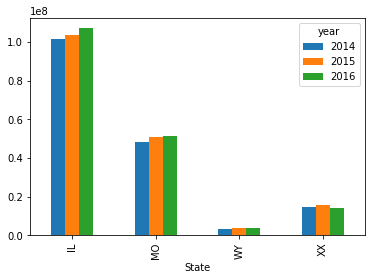

In [116]:
%matplotlib inline
answer.plot.bar()